<a href="https://colab.research.google.com/github/jamieewong/mlsn/blob/main/MLSN_Project_(SF_Bike_Share).ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Week 4

## Loading and Inspecting Data

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

trips = pd.read_csv('/lib/trip.csv')
trips.head()

,id,duration,start_date,start_station_name,start_station_id,end_date,end_station_name,end_station_id,bike_id,subscription_type,zip_code
0,4576,63,8/29/2013 14:13,South Van Ness at Market,66,8/29/2013 14:14,South Van Ness at Market,66,520,Subscriber,94127
1,4607,70,8/29/2013 14:42,San Jose City Hall,10,8/29/2013 14:43,San Jose City Hall,10,661,Subscriber,95138
2,4130,71,8/29/2013 10:16,Mountain View City Hall,27,8/29/2013 10:17,Mountain View City Hall,27,48,Subscriber,97214
3,4251,77,8/29/2013 11:29,San Jose City Hall,10,8/29/2013 11:30,San Jose City Hall,10,26,Subscriber,95060
4,4299,83,8/29/2013 12:02,South Van Ness at Market,66,8/29/2013 12:04,Market at 10th,67,319,Subscriber,94103


In [ ]:
trips.shape

(669959, 11)

In [ ]:
trips.dtypes

,0
id,int64
duration,int64
start_date,object
start_station_name,object
start_station_id,int64
end_date,object
end_station_name,object
end_station_id,int64
bike_id,int64
subscription_type,object


Data is imbalanced between subscribers and customers. There are many more subscribers than customers in the data.

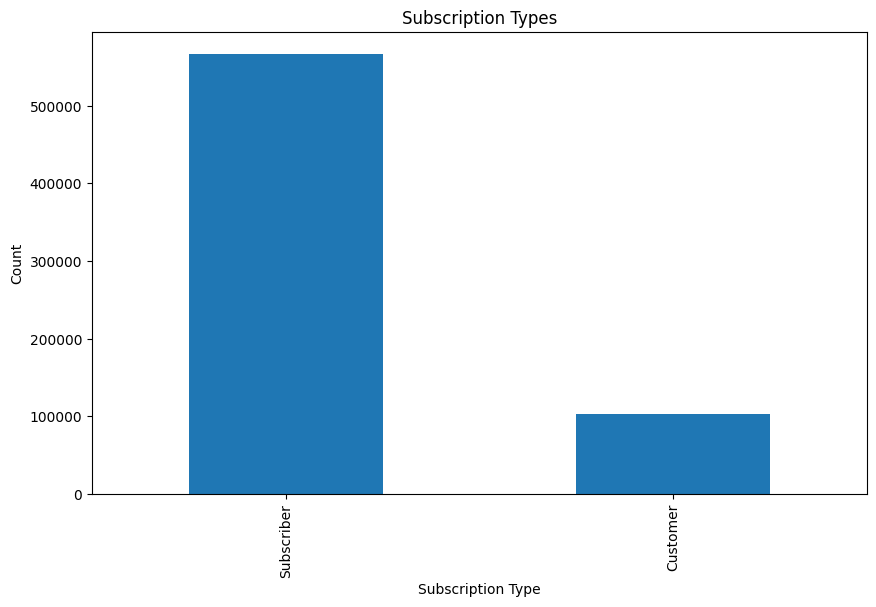

In [ ]:
ax = trips['subscription_type'].value_counts().plot(kind='bar', title ="Subscription Types", figsize=(10, 6))
ax.set_xlabel("Subscription Type")
ax.set_ylabel("Count")
plt.show()

In [ ]:
trips['subscription_type'].value_counts()

,count
subscription_type,
Subscriber,566746
Customer,103213


Both customers and subsribers have outliers on the high end of duration (need to remove?). Looking at the median, customers tend to have longer trips than subscribers.

In [ ]:
trips.groupby(['subscription_type']).describe()['duration']

,count,mean,std,min,25%,50%,75%,max
subscription_type,,,,,,,,
Customer,103213.0,3951.761329,56036.489838,60.0,658.0,1116.0,2329.0,17270400.0
Subscriber,566746.0,590.048856,3451.535920,60.0,323.0,476.0,666.0,1852590.0


No columns had missing values except for `zip_code`.

In [ ]:
trips.isna().sum()

,0
id,0
duration,0
start_date,0
start_station_name,0
start_station_id,0
end_date,0
end_station_name,0
end_station_id,0
bike_id,0
subscription_type,0


## Handling Duplicate Values

`id` column does uniquely identify each row. Additionally, there are 700 distinct bikes.

In [ ]:
len(trips['id'].unique())

669959

In [ ]:
len(trips['bike_id'].unique())

700

No duplicates so nothing was dropped.

In [ ]:
trips = trips.drop_duplicates()
trips.shape

(669959, 11)

## Investigating Missing Zip Code Values

In [ ]:
trips_nozip = trips.loc[(trips['zip_code'].isna())]
trips_nozip.head()

,id,duration,start_date,start_station_name,start_station_id,end_date,end_station_name,end_station_id,bike_id,subscription_type,zip_code
86,4686,273,8/29/2013 15:59,Market at Sansome,77,8/29/2013 16:03,Temporary Transbay Terminal (Howard at Beale),55,624,Customer,NaN
181,4655,413,8/29/2013 15:29,Grant Avenue at Columbus Avenue,73,8/29/2013 15:36,Washington at Kearney,46,474,Customer,NaN
193,4830,424,8/29/2013 17:42,Spear at Folsom,49,8/29/2013 17:49,Yerba Buena Center of the Arts (3rd @ Howard),68,334,Customer,NaN
253,4969,527,8/29/2013 19:36,Grant Avenue at Columbus Avenue,73,8/29/2013 19:44,Temporary Transbay Terminal (Howard at Beale),55,353,Customer,NaN
316,4795,621,8/29/2013 17:22,Beale at Market,56,8/29/2013 17:32,Market at 4th,76,626,Customer,NaN


In [ ]:
trips_nozip['start_station_name'].value_counts().head(10)

,count
start_station_name,
Embarcadero at Sansome,779
Harry Bridges Plaza (Ferry Building),622
Market at 4th,358
Powell at Post (Union Square),314
Powell Street BART,310
Steuart at Market,240
Embarcadero at Vallejo,233
Grant Avenue at Columbus Avenue,215
Civic Center BART (7th at Market),203


In [ ]:
len(trips_nozip['start_station_name'].unique())

71

In addition to some zip codes being missing, some are inaccurate (invalid zip codes). We may need to remove this column.

In [ ]:
trips.loc[trips['start_station_name'] != trips['end_station_name']]

,id,duration,start_date,start_station_name,start_station_id,end_date,end_station_name,end_station_id,bike_id,subscription_type,zip_code
4,4299,83,8/29/2013 12:02,South Van Ness at Market,66,8/29/2013 12:04,Market at 10th,67,319,Subscriber,94103
6,4500,109,8/29/2013 13:25,Santa Clara at Almaden,4,8/29/2013 13:27,Adobe on Almaden,5,679,Subscriber,95112
9,4258,114,8/29/2013 11:33,San Jose City Hall,10,8/29/2013 11:35,MLK Library,11,107,Subscriber,95060
10,4549,125,8/29/2013 13:52,Spear at Folsom,49,8/29/2013 13:55,Embarcadero at Bryant,54,368,Subscriber,94109
11,4498,126,8/29/2013 13:23,San Pedro Square,6,8/29/2013 13:25,Santa Clara at Almaden,4,26,Subscriber,95112
...,...,...,...,...,...,...,...,...,...,...,...
669954,432951,619,9/1/2014 4:21,Powell Street BART,39,9/1/2014 4:32,Townsend at 7th,65,335,Subscriber,94118
669955,432950,6712,9/1/2014 3:16,Harry Bridges Plaza (Ferry Building),50,9/1/2014 5:08,San Francisco Caltrain (Townsend at 4th),70,259,Customer,44100
669956,432949,538,9/1/2014 0:05,South Van Ness at Market,66,9/1/2014 0:14,5th at Howard,57,466,Customer,32
669957,432948,568,9/1/2014 0:05,South Van Ness at Market,66,9/1/2014 0:15,5th at Howard,57,461,Customer,32


## Adding Time Based Features

In [ ]:
trips['start_date'] = pd.to_datetime(trips['start_date'])
trips['end_date'] = pd.to_datetime(trips['end_date'])
trips.head()

,id,duration,start_date,start_station_name,start_station_id,end_date,end_station_name,end_station_id,bike_id,subscription_type,zip_code
0,4576,63,2013-08-29 14:13:00,South Van Ness at Market,66,2013-08-29 14:14:00,South Van Ness at Market,66,520,Subscriber,94127
1,4607,70,2013-08-29 14:42:00,San Jose City Hall,10,2013-08-29 14:43:00,San Jose City Hall,10,661,Subscriber,95138
2,4130,71,2013-08-29 10:16:00,Mountain View City Hall,27,2013-08-29 10:17:00,Mountain View City Hall,27,48,Subscriber,97214
3,4251,77,2013-08-29 11:29:00,San Jose City Hall,10,2013-08-29 11:30:00,San Jose City Hall,10,26,Subscriber,95060
4,4299,83,2013-08-29 12:02:00,South Van Ness at Market,66,2013-08-29 12:04:00,Market at 10th,67,319,Subscriber,94103


In [ ]:
trips['start_hour'] = trips['start_date'].dt.hour
trips['day_of_week'] = trips['start_date'].dt.dayofweek
trips['is_weekend'] = trips['day_of_week'].isin([5,6]) #5 = Sat, 6 = Sun
trips.head()

,id,duration,start_date,start_station_name,start_station_id,end_date,end_station_name,end_station_id,bike_id,subscription_type,zip_code,start_hour,day_of_week,is_weekend
0,4576,63,2013-08-29 14:13:00,South Van Ness at Market,66,2013-08-29 14:14:00,South Van Ness at Market,66,520,Subscriber,94127,14,3,False
1,4607,70,2013-08-29 14:42:00,San Jose City Hall,10,2013-08-29 14:43:00,San Jose City Hall,10,661,Subscriber,95138,14,3,False
2,4130,71,2013-08-29 10:16:00,Mountain View City Hall,27,2013-08-29 10:17:00,Mountain View City Hall,27,48,Subscriber,97214,10,3,False
3,4251,77,2013-08-29 11:29:00,San Jose City Hall,10,2013-08-29 11:30:00,San Jose City Hall,10,26,Subscriber,95060,11,3,False
4,4299,83,2013-08-29 12:02:00,South Van Ness at Market,66,2013-08-29 12:04:00,Market at 10th,67,319,Subscriber,94103,12,3,False


## Investigating Duration



In [ ]:
trips.sort_values(['duration'], ascending = False).head(10)

,id,duration,start_date,start_station_name,start_station_id,end_date,end_station_name,end_station_id,bike_id,subscription_type,zip_code,start_hour,day_of_week,is_weekend
573566,568474,17270400,2014-12-06 21:59:00,South Van Ness at Market,66,2015-06-24 20:18:00,2nd at Folsom,62,535,Customer,95531,21,5,True
382718,825850,2137000,2015-06-28 21:50:00,Market at Sansome,77,2015-07-23 15:27:00,Yerba Buena Center of the Arts (3rd @ Howard),68,466,Customer,97213,21,6,True
440339,750192,1852590,2015-05-02 06:17:00,San Antonio Shopping Center,31,2015-05-23 16:53:00,Castro Street and El Camino Real,32,680,Subscriber,94024,6,5,True
371066,841176,1133540,2015-07-10 10:35:00,University and Emerson,35,2015-07-23 13:27:00,University and Emerson,35,262,Customer,94306,10,4,False
80510,111309,722236,2013-11-30 13:29:00,University and Emerson,35,2013-12-08 22:06:00,University and Emerson,35,247,Customer,94301,13,5,True
606063,522337,720454,2014-10-30 08:29:00,Redwood City Caltrain Station,22,2014-11-07 15:36:00,Stanford in Redwood City,25,692,Customer,94010,8,3,False
223016,323594,716480,2014-06-13 16:57:00,Harry Bridges Plaza (Ferry Building),50,2014-06-21 23:59:00,Civic Center BART (7th at Market),72,633,Subscriber,94131,16,4,False
195379,361321,715339,2014-07-13 05:50:00,Arena Green / SAP Center,14,2014-07-21 12:32:00,Adobe on Almaden,5,251,Customer,nil,5,6,True
421839,774999,688899,2015-05-20 15:27:00,Palo Alto Caltrain Station,34,2015-05-28 14:49:00,California Ave Caltrain Station,36,230,Customer,nil,15,2,False
524521,635260,655939,2015-02-08 03:05:00,San Jose Civic Center,3,2015-02-15 17:17:00,SJSU 4th at San Carlos,12,132,Customer,89451,3,6,True


In [ ]:
trips.describe()['duration']

,duration
count,6.699590e+05
mean,1.107950e+03
min,6.000000e+01
25%,3.440000e+02
50%,5.170000e+02
75%,7.550000e+02
max,1.727040e+07
std,2.225544e+04


- max is 17270400 seconds(200 days)
- min is 1 minute
- average is 1107.95 seconds (~18.5 minutes)
- standard deviation is 2255.5 seconds (~37.6 minutes)
- may need to remove outliers?

## Removing Outliers and Irrelevant Features

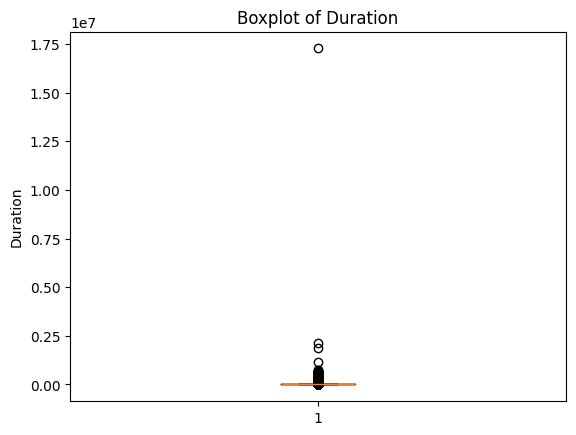

In [ ]:
boxplot1 = plt.boxplot(trips['duration'])
plt.title(f'Boxplot of Duration')
plt.ylabel('Duration')
plt.show()

In [ ]:
outliers = boxplot1['fliers'][0].get_ydata()
len(outliers)

51131

In [ ]:
type(outliers)

numpy.ndarray

In [ ]:
np.min(outliers)

np.int64(1372)

In [ ]:
#trips.to_csv('cleaned_trips.csv', index=False)

# Week 5

Average Duration by Subscription Type:
subscription_type
Customer      3951.761329
Subscriber     590.048856
Name: duration, dtype: float64


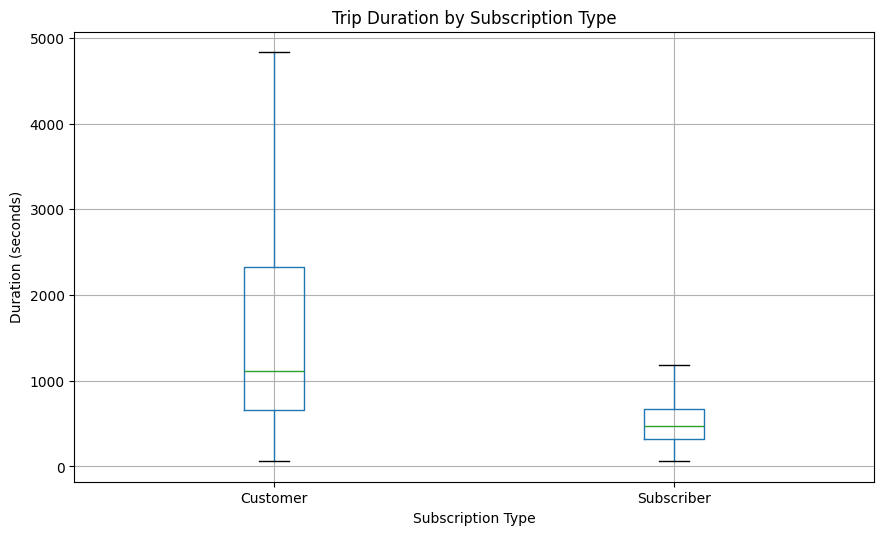

In [ ]:
# Average trip duration by subscription type
avg_duration = trips.groupby('subscription_type')['duration'].mean()
print("Average Duration by Subscription Type:")
print(avg_duration)

# Boxplot for visual comparison
trips.boxplot(column='duration', by='subscription_type', showfliers=False, figsize=(10, 6))
plt.title("Trip Duration by Subscription Type")
plt.suptitle("")
plt.xlabel("Subscription Type")
plt.ylabel("Duration (seconds)")
plt.show()


In [ ]:
weather = pd.read_csv('/lib/weather.csv') #load data
weather['date'] = pd.to_datetime(weather['date']).dt.date # Extract date only

In [ ]:
weather.head()

,date,max_temperature_f,mean_temperature_f,min_temperature_f,max_dew_point_f,mean_dew_point_f,min_dew_point_f,max_humidity,mean_humidity,min_humidity,...,mean_visibility_miles,min_visibility_miles,max_wind_Speed_mph,mean_wind_speed_mph,max_gust_speed_mph,precipitation_inches,cloud_cover,events,wind_dir_degrees,zip_code
0,2013-08-29,74.0,68.0,61.0,61.0,58.0,56.0,93.0,75.0,57.0,...,10.0,10.0,23.0,11.0,28.0,0,4.0,NaN,286.0,94107
1,2013-08-30,78.0,69.0,60.0,61.0,58.0,56.0,90.0,70.0,50.0,...,10.0,7.0,29.0,13.0,35.0,0,2.0,NaN,291.0,94107
2,2013-08-31,71.0,64.0,57.0,57.0,56.0,54.0,93.0,75.0,57.0,...,10.0,10.0,26.0,15.0,31.0,0,4.0,NaN,284.0,94107
3,2013-09-01,74.0,66.0,58.0,60.0,56.0,53.0,87.0,68.0,49.0,...,10.0,10.0,25.0,13.0,29.0,0,4.0,NaN,284.0,94107
4,2013-09-02,75.0,69.0,62.0,61.0,60.0,58.0,93.0,77.0,61.0,...,10.0,6.0,23.0,12.0,30.0,0,6.0,NaN,277.0,94107


## Merge with Trips Data

In [ ]:
trips = pd.read_csv('/lib/cleaned_trips.csv') #load trips
trips['date'] = pd.to_datetime(trips['start_date']).dt.date
merged = pd.merge(trips, weather, on='date', how='left') #merged file

## Add Weather Features

In [ ]:
# Replace 'T' with 0.0 in the 'precipitation_inches' column before converting to float
merged['precipitation_inches'] = merged['precipitation_inches'].replace('T', 0.0).astype(float)

merged['is_rainy'] = merged['precipitation_inches'] > 0.1  # True if rainy

In [ ]:
merged[["is_rainy"]]

,is_rainy
0,False
1,False
2,False
3,False
4,False
...,...
3349790,False
3349791,False
3349792,False
3349793,False


## Encode Target Value

In [ ]:
merged['subscription_type'] = merged['subscription_type'].map({'Customer': 0, 'Subscriber': 1})

## Finalize Dataset

In [ ]:
final_data = merged[['duration', 'start_hour', 'is_weekend', 'is_rainy', 'subscription_type']]
#final_data.to_csv('final_data.csv', index=False)

In [ ]:
final_data.head()

,duration,start_hour,is_weekend,is_rainy,subscription_type
0,63,14,False,False,1
1,63,14,False,False,1
2,63,14,False,False,1
3,63,14,False,False,1
4,63,14,False,False,1


# Week 6

## Splitting Data

In [ ]:
from sklearn.model_selection import train_test_split
X = final_data.drop('subscription_type', axis=1)
y = final_data['subscription_type']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

## Training the Models
Out of our two models, random forest had the higher accuracy.

In [ ]:
from sklearn.linear_model import LogisticRegression
lr = LogisticRegression(max_iter=1000)
lr.fit(X_train, y_train)
print("Logistic Regression Accuracy:", lr.score(X_test, y_test))

Logistic Regression Accuracy: 0.8863840921608636


In [ ]:
from sklearn.ensemble import RandomForestClassifier
rf = RandomForestClassifier(n_estimators=100) # Use 100 trees
rf.fit(X_train, y_train)
print("Random Forest Accuracy:", rf.score(X_test, y_test))

Random Forest Accuracy: 0.918333808486788


## Saving the Best Model

In [ ]:
import joblib
joblib.dump(rf, 'bike_model.pkl') # Save Random Forest

['bike_model.pkl']

# Week 7

## Confusion Matrix

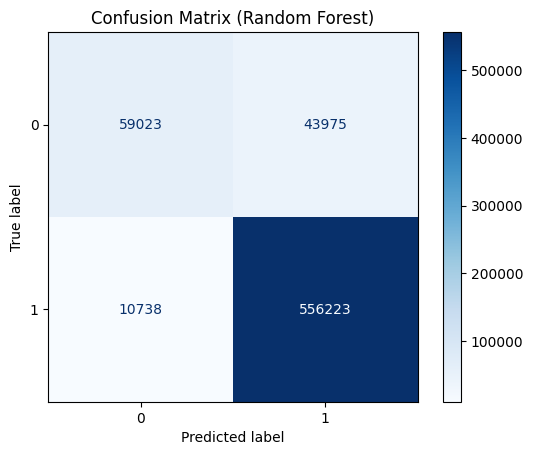

In [40]:
from sklearn.metrics import ConfusionMatrixDisplay
import matplotlib.pyplot as plt
ConfusionMatrixDisplay.from_estimator(rf, X_test, y_test, cmap='Blues')
plt.title('Confusion Matrix (Random Forest)')
plt.savefig('confusion_matrix.png')

## Feature Importance Plot

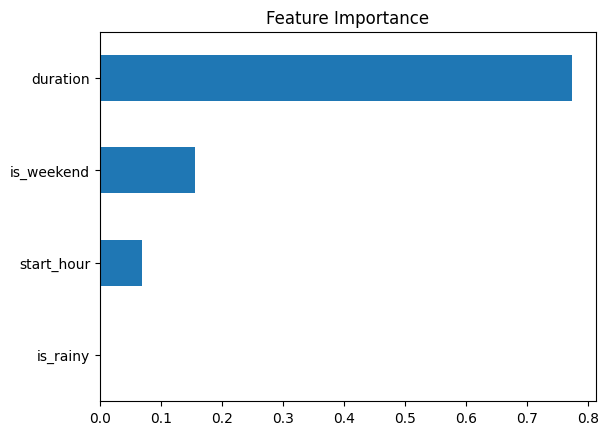

In [41]:
importances = pd.Series(rf.feature_importances_, index=X.columns)
importances.sort_values().plot(kind='barh')
plt.title('Feature Importance')
plt.savefig('feature_importance.png')

## User Behavior Analysis

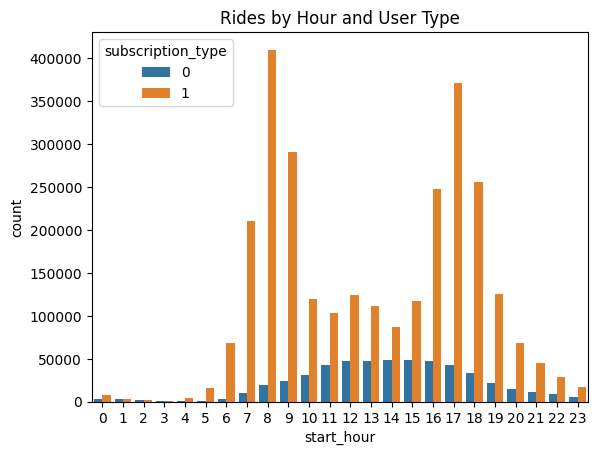

In [42]:
#Plot rides by hour
import seaborn as sns
sns.countplot(data=final_data, x='start_hour', hue='subscription_type')
plt.title('Rides by Hour and User Type')
plt.savefig('rides_by_hour.png')